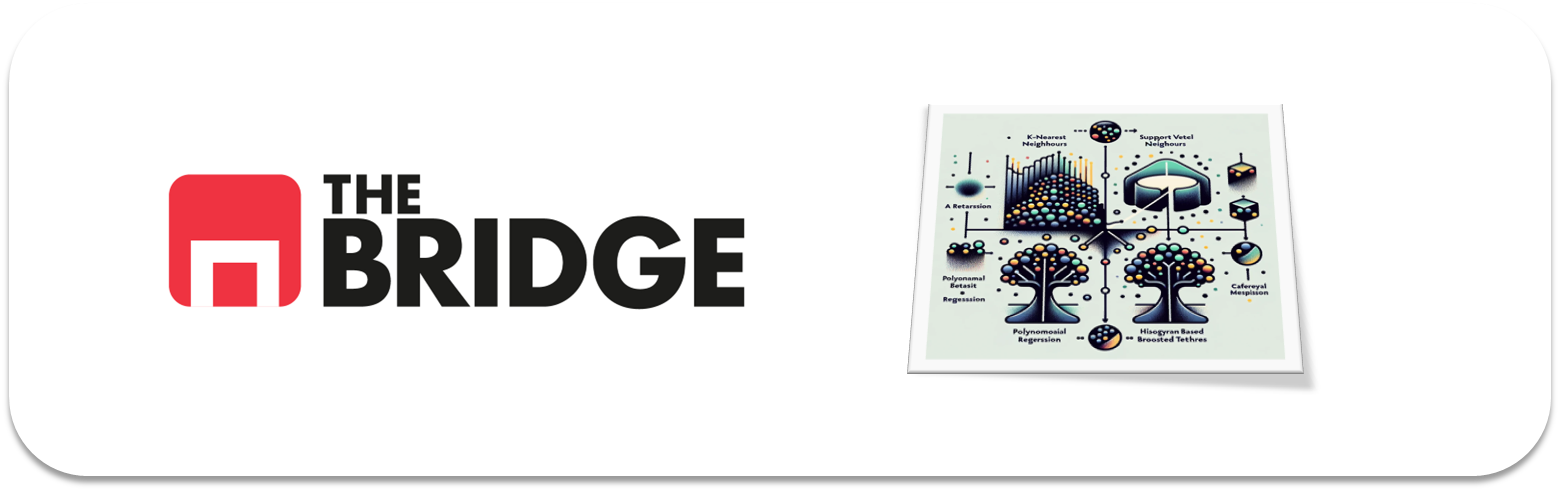

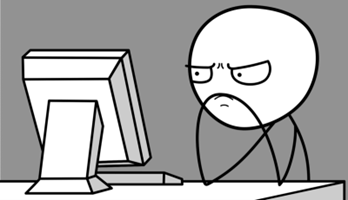

Para ejercitarte y afianzar lo aprendido sobre **Etapas Adicionales**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 

from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

### #1 Equilibrado de Datasets

### Ejercicio 1

Carga el dataset de los diamantes (está en el directorio "data") preparado ya para poder entrenar un modelo de clasificación. Muestra las primeras 7 filas y observa el listado de columnas. Muestra la distribución del potencial target ("cut") que ya conoces. ¿Está desbalanceada?

In [2]:
df = pd.read_csv("./data/diamonds_preparado.csv", sep= "|")

In [3]:
df.head(7)

,carat,cut,depth,table,price,x,y,z,color_D,color_E,...,color_I,color_J,clarity_IF,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,0.23,Ideal,61.5,55.0,326,3.95,3.98,2.43,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0.21,Premium,59.8,61.0,326,3.89,3.84,2.31,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0.23,Good,56.9,65.0,327,4.05,4.07,2.31,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0.29,Premium,62.4,58.0,334,4.20,4.23,2.63,0,0,...,1,0,0,0,0,0,1,0,0,0
4,0.31,Good,63.3,58.0,335,4.34,4.35,2.75,0,0,...,0,1,0,0,0,0,0,0,1,0
5,0.24,Very Good,62.8,57.0,336,3.94,3.96,2.48,0,0,...,0,1,0,0,1,0,0,0,0,0
6,0.24,Very Good,62.3,57.0,336,3.95,3.98,2.47,0,0,...,1,0,0,1,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carat         53940 non-null  float64
 1   cut           53940 non-null  object 
 2   depth         53940 non-null  float64
 3   table         53940 non-null  float64
 4   price         53940 non-null  int64  
 5   x             53940 non-null  float64
 6   y             53940 non-null  float64
 7   z             53940 non-null  float64
 8   color_D       53940 non-null  int64  
 9   color_E       53940 non-null  int64  
 10  color_F       53940 non-null  int64  
 11  color_G       53940 non-null  int64  
 12  color_H       53940 non-null  int64  
 13  color_I       53940 non-null  int64  
 14  color_J       53940 non-null  int64  
 15  clarity_IF    53940 non-null  int64  
 16  clarity_VVS1  53940 non-null  int64  
 17  clarity_VVS2  53940 non-null  int64  
 18  clarity_VS1   53940 non-nu

In [5]:
target= "cut"

In [6]:
df[target].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

<Axes: xlabel='cut', ylabel='percent'>

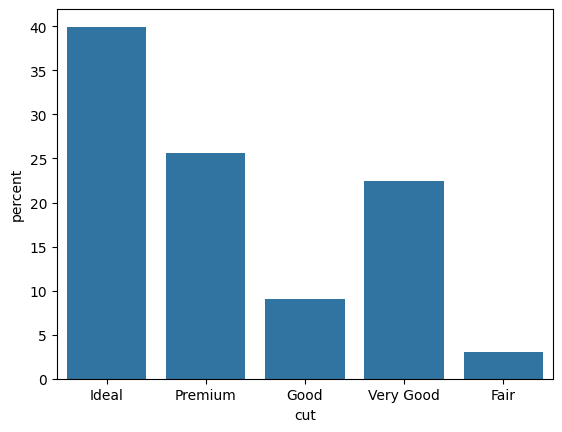

In [7]:
sns.countplot(df, x= target, stat= "percent")

- El target esta desbalanceado

 ### Ejercicio 2

 Crea un train_set y un test_set al 20%, crea los pares X,y de train y test con el target en la variable "cut", considera el resto como features.

In [8]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns= target), df[target], test_size= 0.2, random_state= 73)

### Ejercicio 3

Instancia un modelo RandomForest con max_depth a 5 y sin tocar otro hiperparámetro, entrénalo con el X_train y el y_train. Y muestra el classification_report para el X_train.

In [9]:
rfc = RandomForestClassifier(max_depth=5, random_state=73)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, random_state=73)

In [10]:
predic = rfc.predict(X_train)
print(classification_report(y_train,predic))

              precision    recall  f1-score   support

        Fair       0.90      0.65      0.75      1294
        Good       0.81      0.32      0.46      3955
       Ideal       0.78      0.94      0.85     17216
     Premium       0.58      0.87      0.70     10995
   Very Good       0.62      0.22      0.32      9692

    accuracy                           0.69     43152
   macro avg       0.74      0.60      0.62     43152
weighted avg       0.70      0.69      0.65     43152



### Ejercicio 4

Dado el desbalanceo, nos queremos fijar en el recall medio (la media del recall considerando cada clase). Usando "cross_val_score", hagamos una estimación un poco más precisa (y en general pesimista) de cual sería ese recall medio del modelo en general. Asigna para ello a `scoring` el valor `balanced_accuracy`

In [11]:
balanced_accuracy = cross_val_score(rfc, X_train, y_train, cv= 5, scoring= "balanced_accuracy").mean()
balanced_accuracy


0.5633680420798501

### Ejercicio 5

El resultado obtenido en el ejercicio 4 es bueno o malo dependiendo de lo que "Negocio" nos diga. Supón que negocio nos dice que quiere como mínimo que cada clase tenga un 50% de recall (que al menos un 50% de cada clase de diamente se etiquete bien por el modelo). Viendo el report anterior seguro que ves que así no llegamos. Tenemos que hacer algo, ayudar al modelo a conseguir ese objetivo. ¿Cómo? Con las téncias de equilibrado. Empecemos por aumentar las clases minoritarias con SMOTE. 

Crea un X_train y un y_train balanceados aplicando SMOTE; muestra el reparto del y_train para ver que se ha balanceado en todas las clases

In [12]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [13]:
y_train_smote.value_counts()

cut
Ideal        17216
Premium      17216
Very Good    17216
Fair         17216
Good         17216
Name: count, dtype: int64

### Ejercicio 6

Entrena con el nuevo X,y y muestra los resultados del modelo así entrenado pero prediciendo contra el X_test creado en el ejercicio 2. Comenta el resultado. NOTA: En el caso de querer balancear con tecnicas de Oversampling y Undersampling, es interesante crear un set de validación adicional al de test y train, para no tener que usar el test como validación de los modelos.

In [14]:
rfc_smote = RandomForestClassifier(max_depth=5, random_state=73)
rfc_smote.fit(X_train_smote,y_train_smote)

RandomForestClassifier(max_depth=5, random_state=73)

In [15]:
y_predic = rfc_smote.predict(X_test)
print(classification_report(y_test,y_predic))

              precision    recall  f1-score   support

        Fair       0.89      0.78      0.83       316
        Good       0.51      0.64      0.57       951
       Ideal       0.77      0.92      0.84      4335
     Premium       0.61      0.83      0.70      2796
   Very Good       0.50      0.06      0.11      2390

    accuracy                           0.68     10788
   macro avg       0.65      0.65      0.61     10788
weighted avg       0.65      0.68      0.62     10788



### Ejercicio 7

Prueba ahora a mejorar el modelo empleando el hiperparámetro class_weight. Reinstancia el modelo, entrenalo contra el X_train inicial y luego muestra el report contra el test. Comenta brevemente el resultado.

In [16]:
rfc_1 = RandomForestClassifier(max_depth= 5, class_weight="balanced", random_state=73)
rfc_1.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, random_state=73)

In [17]:
y_predic_1 = rfc_1.predict(X_test)
print(classification_report(y_test,y_predic_1))

              precision    recall  f1-score   support

        Fair       0.83      0.79      0.81       316
        Good       0.49      0.70      0.58       951
       Ideal       0.79      0.92      0.85      4335
     Premium       0.61      0.83      0.70      2796
   Very Good       0.47      0.06      0.11      2390

    accuracy                           0.68     10788
   macro avg       0.64      0.66      0.61     10788
weighted avg       0.65      0.68      0.62     10788



### Ejercicio 8

Para terminar con nuestros intentos de mejorar la clasificación "global", vamos a aplicar el bajomuestreo de las clases mayoritarias, aunque no tengamos muchas esperanzas puestas en ello. Para poder hacerlo vamos a usar la clase `RandomUnderSampler` de la biblioteca imblearn. Investiga un poco sobre su funcionamiento (pista es equivalente en su uso a la clase Smote) y crea un dataset con undersampling de forma que las clases estén equilibradas. Muestra las frecuencias del target. ¿Por qué no tenemos muchas expectativas, en este caso, sobre esta técnica? 

In [18]:
rus = RandomUnderSampler(random_state=73)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

In [19]:
y_train_res.value_counts()

cut
Fair         1294
Good         1294
Ideal        1294
Premium      1294
Very Good    1294
Name: count, dtype: int64

- Supongo que no es porque nos quedamos con muy pocas muestras 

### Ejercicio 9

Entrena, ahora con class_weight a None, un RandomForest como el inicial pero contra el train creado en el ejercicio 8, muestra su informe de clasificación sobre la predicción contra test y comenta el resultado.

In [20]:
rfc_res = RandomForestClassifier(max_depth=5,random_state=73)
rfc_res.fit(X_train_res, y_train_res)
y_predic_res = rfc_res.predict(X_train_res)
print(classification_report(y_train_res,y_predic_res))

              precision    recall  f1-score   support

        Fair       0.96      0.82      0.88      1294
        Good       0.69      0.71      0.70      1294
       Ideal       0.68      0.92      0.78      1294
     Premium       0.51      0.84      0.64      1294
   Very Good       0.64      0.07      0.13      1294

    accuracy                           0.67      6470
   macro avg       0.70      0.67      0.63      6470
weighted avg       0.70      0.67      0.63      6470



### #2 Análisis de Errores

### Ejercicio 10

Muestra la matriz de confusión con "ConfusionMatrixDisplay.from_predictions" para el clasificador entrenado con el hiperparámetro class_weight con el valor "balanced" (el del ejercicio 7). Asigna el valor "true" (ojo es un string, no el booleano True) al argumento normalize. Comenta que estamos viendo y hacia donde se dirigen los errores de clasificación de "Very Good"

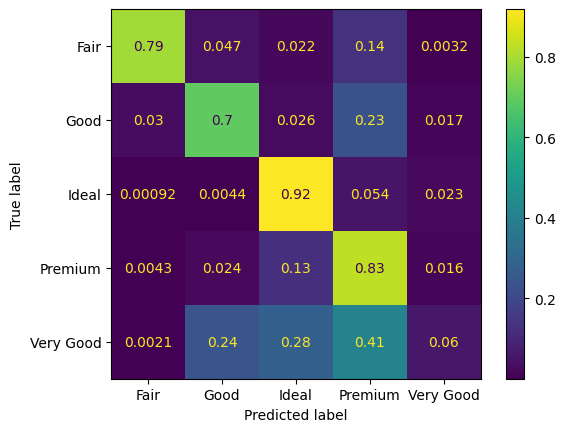

In [21]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predic_1, normalize="true")

- Los errores de clasificación de "very good" se dirigen hacía abajo, un 40% de los diamantes de corte "very good" los clasifica como "premium" y un 28% como "ideal" y otro 24% como "good".

### Ejercicio 11

Muestra ahora la matriz de confusión, empleando la misma función, pero esta vez enseñando los porcentajes de distribució de los errores en la predicción, para eso emplea normalize = "pred" como argumeto y date cuenta de que las columnas son las que ahora suman el 100%. Comenta el resultado respecto a "Premium" como predicción y a lo que se equivoca respecto a "Very Good". 

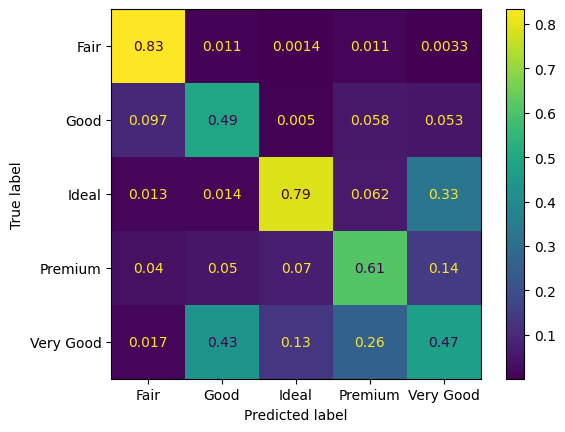

In [22]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predic_1, normalize="pred")

- El modelo predice un 26% como "premiun" cuando en realidad son "very good"

### Ejercicio 12

Dada la relación entre los errores de "Very Good" y "Prediction" que puedes haber observado en los ejercicios anteriores, una posible mejora es introducir un modelo que corrija esos errores, pero esa es la filosofía de los Gradient Boosted Trees. Provemos esa línea: Entrena un CatBoost con los hiperparámetros ajustados para que no emplee más de 5 niveles en sus árboles intermedios y para que balanceé las clases.

1. Obtener el "balanced_accuracy" primero con una validación cruzada.
2. Evaluálo después de contra el test.

In [23]:
cat = CatBoostClassifier(max_depth= 5, verbose= False, auto_class_weights= "Balanced")

In [24]:
b_a = cross_val_score(cat, X_train, y_train, cv=5, scoring= "balanced_accuracy").mean()
b_a

0.788317421559807

In [25]:
cat.fit(X_train,y_train)
y_pred= cat.predict(X_test)
print(classification_report(y_test, y_pred)) 


              precision    recall  f1-score   support

        Fair       0.87      0.89      0.88       316
        Good       0.71      0.77      0.74       951
       Ideal       0.83      0.89      0.86      4335
     Premium       0.79      0.82      0.80      2796
   Very Good       0.67      0.53      0.59      2390

    accuracy                           0.78     10788
   macro avg       0.77      0.78      0.77     10788
weighted avg       0.77      0.78      0.78     10788



- Obtuvimos mejores resultados con el CatBoost y conseguimos las metricas que pedía negocio